# 4.1 Pandas 패키지의 소개

Pandas 패키지는 데이터 분석을 할 때 가장 많이 쓰이는 패키지다. 대부분의 데이터는 시계열(series)이나 표(table)의 형태로 나타낼 수 있는데 Pandas 패키지에서는 이러한 표 데이터를 다루기 위한 **시리즈(``Series``) 클래스**와 **데이터프레임(``DataFrame``) 클래스**를 제공한다.

## 판다스 패키지 임포트
판다스 패키지를 사용하기 위해 우선 임포트를 해야 한다. 판다스 패키지는 pd라는 별칭으로 임포트하는 것이 관례이므로 여기에서도 해당 관례를 따르도록 한다.

In [73]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [74]:
import pandas as pd

## 시리즈 클래스

시리즈 클래스는 NumPy에서 제공하는 1차원 배열과 비슷하지만 각 데이터의 의미를 표시하는 **인덱스(index)**를 붙일 수 있다. 데이터 자체는 **값(value)**라고 한다.

> 시리즈 = 값(value) + 인덱스(index)

### 시리즈 생성

데이터를 리스트나 1차원 배열 형식으로 ``Series`` 클래스 생성자에 넣어주면 시리즈 클래스 객체를 만들 수 있다. 인덱스의 길이는 데이터의 길이와 같아야 한다. 다음 예에서 이 "서울", "부산" 등의 문자열이 인덱스의 값이다. 인덱스의 값을 **인덱스 라벨(label)**이라고도 한다. 인덱스 라벨은 문자열 뿐 아니라 날짜, 시간, 정수 등도 가능하다.

다음 예제는 각 도시의 2015년 인구 데이터를 시리즈로 만든 것이다.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default') 

In [6]:
import pandas as pd                     
s = pd.Series([9904312, 3448737, 2890451, 2466052],  # pandas에서 Series는 1차원 배열
              index=["서울", "부산", "인천", "대구"])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [7]:
s.ndim         ### numpy와 동일

1

In [8]:
s.shape

(4,)

만약 인덱스를 지정하지 않고 시리즈를 만들면 시리즈의 인덱스는 0부터 시작하는 정수값이 된다.

In [9]:
import numpy as np
pd.Series(np.arange(10, 14))

0    10
1    11
2    12
3    13
dtype: int64

In [13]:
pd.Series(range(10, 14))     ## np.array([1, 2, 3]), np.arange(10, 14)

0    10
1    11
2    12
3    13
dtype: int64

시리즈의 인덱스는 ``index`` 속성으로 접근할 수 있다. 시리즈의 값은 1차원 배열이며 ``values`` 속성으로 접근할 수 있다.

In [10]:
s.index    ## numpy에서는 불가

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [15]:
type(s.index)

pandas.core.indexes.base.Index

In [11]:
s.values    

array([9904312, 3448737, 2890451, 2466052])

In [12]:
type(s.values)

numpy.ndarray

`name` 속성을 이용하여  시리즈 데이터에 이름을 붙일 수 있다. `index.name` 속성으로 시리즈의 인덱스에도 이름을 붙일 수 있다. 

In [13]:
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

### 시리즈 연산

NumPy 배열처럼 시리즈도 **벡터화 연산**을 할 수 있다. 다만 연산은 **시리즈의 값에만 적용**되며 인덱스 값은 변하지 않는다. 예를 들어 인구 숫자를 백만 단위로 만들기 위해 시리즈 객체를 1,000,000 으로 나누어도 인덱스 라벨에는 영향을 미치지 않는 것을 볼 수 있다.

In [14]:
s / 1000000       ## numpy scalar 연산과 동일

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

### 시리즈 인덱싱

시리즈는 NumPy 배열에서 가능한 인덱스 방법 이외에도 인덱스 라벨을 이용한 인덱싱도 할 수 있다. 배열 인덱싱이나 인덱스 라벨을 이용한 슬라이싱(slicing)도 가능하다. 

In [15]:
s[1], s["부산"]    

(np.int64(3448737), np.int64(3448737))

In [16]:
s[3], s["대구"]

(np.int64(2466052), np.int64(2466052))

배열 인덱싱을 하면 자료의 순서를 바꾸거나 특정한 자료만 선택할 수 있다.

In [17]:
s[[0, 3, 1]]      ## numpy 1차원 array(vector)와 동일함

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [85]:
s[["서울", "대구", "부산"]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [18]:
s[(s > 250e4) & (s < 500e4)]    ## numpy 1차원 array와 동일

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [87]:
(s > 250e4) & (s < 500e4)

도시
서울    False
부산     True
인천     True
대구    False
Name: 인구, dtype: bool

**문자열 라벨을 이용한 슬라이싱**을 하는 경우에는 **콜론(:) 기호 뒤에 오는 인덱스에 해당하는 값도 결과에 포함**되므로 주의해야 한다.

In [19]:
s[1:3]     # List / numpy 동일  ( 3번 포함 안됨 )

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [26]:
s["부산":"대구"]  ### 문자로 인덱싱할 때는 마지막 인덱스 포함!!!

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

만약 **라벨 값이 영문 문자열인 경우**에는 마치 속성인것처럼 **점(.)을 이용하여 접근**할 수도 있다.

In [20]:
s0 = pd.Series(range(3), index=["a", "b", "cc"])
s0

a     0
b     1
cc    2
dtype: int64

In [90]:
s0.cc

np.int64(2)

In [21]:
s0["a"], s0.a

(np.int64(0), np.int64(0))

In [22]:
s0.b

np.int64(1)

###  시리즈와 딕셔너리 자료형

시리즈 객체는 라벨 값에 의해 인덱싱이 가능하므로 실질적으로 라벨 값을 키(key)로 가지는 **딕셔너리 자료형과 같다**고 볼 수 있다. 따라서 딕셔너리 자료형에서 제공하는 **``in`` 연산도 가능**하고 **``items`` 메서드**를 사용하면 **``for`` 루프를 통해 각 원소의 키(key)와 값(value)을 접근**할 수도 있다.

In [23]:
"서울" in s

True

In [94]:
"대전" in s

False

In [24]:
list(s.items())

[('서울', 9904312), ('부산', 3448737), ('인천', 2890451), ('대구', 2466052)]

In [25]:
for d in s.items() :
    print(d)

('서울', 9904312)
('부산', 3448737)
('인천', 2890451)
('대구', 2466052)


In [26]:
for k, v in s.items():
    print("%s = %d" % (k, v))

서울 = 9904312
부산 = 3448737
인천 = 2890451
대구 = 2466052


또 **딕셔너리 객체에서 시리즈**를 만들 수도 있다. 이번에는 2010년의 인구 자료를 `s2`라는 이름의 시리즈로 만들어 보자. 이 데이터에는 대구의 인구 자료는 없지만 대신 대전의 인구 자료가 포함되어 있다.

In [27]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158})
s2         ## Dictionary를 pandas Series로

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [98]:
s2.name = "우리나라"   ## Series의 이름 지정
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
Name: 우리나라, dtype: int64

In [28]:
s2.index     # Series의 인덱스만  (판다스의 인덱스 타입)

Index(['서울', '부산', '인천', '대전'], dtype='object')

In [29]:
s2.index.name = "도시"    # pandas의 인덱스 이름 지정

In [30]:
s2

도시
서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

딕셔너리의 원소는 순서를 가지지 않으므로 시리즈의 데이터도 순서가 보장되지 않는다. 만약 **순서를 정하고 싶다면 인덱스를 리스트로 지정**해야 한다.

In [31]:
s3 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158},
               index=["부산", "서울", "인천", "대전"])   ## Index로 순서 지정
s3

부산    3393191
서울    9631482
인천    2632035
대전    1490158
dtype: int64

### 인덱스 기반 연산

이번에는 **2015년도와 2010년의 인구 증가를 계산**해 보자. 두 개의 **시리즈의 차이**를 구하면 된다. 두 시리즈에 대해 연산을 하는 경우 **인덱스가 같은 데이터에 대해서만** 차이를 구한다.

In [32]:
ds = s - s2  #  키값이 같은 것 끼리 연산
ds

도시
대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [33]:
s.values - s2.values  # 같은 자리수끼리 연산

array([272830,  55546, 258416, 975894])

대구와 대전의 경우에는 **2010년 자료와 2015년 자료가 모두 존재하지 않기 때문에 계산이 불가능**하므로 **``NaN``(Not a Number)** 이라는 값을 가지게 된다. 또한 ``NaN`` 값이 ``float`` 자료형에서만 가능하므로 다른 계산 결과도 모두 ``float`` 자료형이 되었다는 점에 주의한다. **``NaN``이 아닌 값**을 구하려면 **``notnull`` 메서드**를 사용한다.

In [34]:
ds

도시
대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [106]:
ds.notnull()   # Null이 아닌 위치에 True

도시
대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

In [35]:
ds.isnull()

도시
대구     True
대전     True
부산    False
서울    False
인천    False
dtype: bool

In [36]:
print(type(ds[ds.notnull()] )) # Null이 아닌 위치의 값만으로 Slicing하여 pandas Series 구성
ds[ds.notnull()]

<class 'pandas.core.series.Series'>


도시
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

마찬가지로 인구 증가율(%)은 다음과 같이 구할 수 있다.

In [37]:
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [109]:
s2

도시
서울    9631482
부산    3393191
인천    2632035
대전    1490158
Name: 우리나라, dtype: int64

In [40]:
rs = (s - s2) / s2 * 100
rs = rs[rs.notnull()]
rs

도시
부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

### 데이터의 갱신, 추가, 삭제

인덱싱을 이용하면 딕셔너리처럼 데이터를 갱신(update)하거나 추가(add)할 수 있다.

In [43]:
rs["부산"] = 1.63
rs

도시
부산    1.630000
인천    9.818107
dtype: float64

In [44]:
## 대구 인덱스가 없을 떄 값을 넣으면 -> 생성
rs["대구"] = 1.41
rs

도시
부산    1.630000
인천    9.818107
대구    1.410000
dtype: float64

In [ ]:
del rs['대구']

In [47]:
# 생성이 아니라 수정이 하고 싶을 때
if "대구" in rs :
    rs["대구"] = 1.41
rs

도시
부산    1.630000
인천    9.818107
대구    1.410000
dtype: float64

데이터를 삭제할 때도 딕셔너리처럼 ``del`` 명령을 사용한다.

In [42]:
del rs["서울"]    ## Dictionary와 동일
rs

도시
부산    1.630000
인천    9.818107
dtype: float64

#### 연습 문제 4.1.1

1. 임의로 두 개의 시리즈 객체를 만든다. 모두 문자열 인덱스를 가져야 하며 두 시리즈에 공통적으로 포함되지 않는 라벨이 있어야 한다.


2. 위에서 만든 두 시리즈 객체를 이용하여 사칙 연산을 한다.

---
## 데이터프레임 클래스

시리즈가 1차원 벡터 데이터에 행방향 인덱스(row index)를 붙인 것이라면 **데이터프레임(Data-Frame)** 클래스는 **2차원 행렬 데이터에 인덱스를 붙인 것과 비슷**하다. 2차원이므로 각각의 행 데이터의 이름이 되는 **행방향 인덱스(row index)** 뿐 아니라 각각의 열 데이터의 이름이 되는 **열방향 인덱스(column index)** 도 붙일 수 있다.

### 데이터프레임 생성

데이터프레임을 만드는 방법은 다양하다. 가장 간단한 방법은 다음과 같다.

1. 우선 하나의 열이 되는 데이터를 **리스트**나 **일차원 배열**을 준비한다. 
2. 이 각각의 **열에 대한 이름(라벨)을 키로 가지는 딕셔너리**를 만든다.
3. 이 데이터를 ``DataFrame`` 클래스 생성자에 넣는다. 동시에 **열방향 인덱스는 ``columns`` 인수**로, **행방향 인덱스는 ``index`` 인수**로 지정한다.

In [48]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
type(data)

dict

In [49]:
pd.DataFrame(data)

,2015,2010,2005,2000,지역,2010-2015 증가율
0,9904312,9631482,9762546,9853972,수도권,0.0283
1,3448737,3393191,3512547,3655437,경상권,0.0163
2,2890451,2632035,2517680,2466338,수도권,0.0982
3,2466052,2431774,2456016,2473990,경상권,0.0141


In [50]:
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]

###### DataFrame 만들기... 
df = pd.DataFrame(data, index=index, columns=columns)  ## data:딕셔너리, index/columns: 리스트
print(df)
df

     지역     2015     2010     2005     2000  2010-2015 증가율
서울  수도권  9904312  9631482  9762546  9853972         0.0283
부산  경상권  3448737  3393191  3512547  3655437         0.0163
인천  수도권  2890451  2632035  2517680  2466338         0.0982
대구  경상권  2466052  2431774  2456016  2473990         0.0141


,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


앞에서 데이터프레임은 2차원 배열 데이터를 기반으로 한다고 했지만 사실은 **공통 인덱스를 가지는 열 시리즈(column series)를 딕셔너리로 묶어놓은 것**이라고 보는 것이 더 정확하다. 2차원 배열 데이터는 모든 원소가 같은 자료형을 가져야 하지만 데이터프레임은 **각 열(column)마다 자료형이 다를 수 있기 때문**이다. 위 예제에서도 지역과 인구와 증가율은 각각 문자열, 정수, 부동소수점 실수이다.

시리즈와 마찬가지로 **데이터만 접근하려면 ``values`` 속성**을 사용한다. 열방향 인덱스와 행방향 인덱스는 각각 ``columns``, ``index`` 속성으로 접근한다.

In [51]:
df.values      ### 결과 값은 numpy array임

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [52]:
type(df.values)

numpy.ndarray

In [53]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [119]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

시리즈에서 처럼 열방향 인덱스와 행방향 인덱스에 이름을 붙이는 것도 가능하다.

In [120]:
df.index.name = "도시"
df.columns.name = "특성"
df.name = "도시별 인구"
print(df)
df

특성   지역     2015     2010     2005     2000  2010-2015 증가율
도시                                                        
서울  수도권  9904312  9631482  9762546  9853972         0.0283
부산  경상권  3448737  3393191  3512547  3655437         0.0163
인천  수도권  2890451  2632035  2517680  2466338         0.0982
대구  경상권  2466052  2431774  2456016  2473990         0.0141


특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


#### 연습 문제 4.1.2

다음과 같은 내용의 데이터프레임을 만들어라. 
 
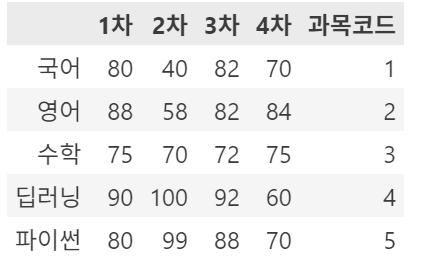

In [121]:
import pandas as pd
data = {
    "과목코드" : [1, 2, 3, 4, 5],
    "1차": [80, 88, 75, 90, 80],
    "2차": [40, 58, 70, 100, 99],
    "3차": [82, 82, 72, 92, 88],
    "4차": [70, 84, 75, 60, 70], 
}
columns = ["1차", "2차", "3차", "4차", "과목코드"]
index = ["국어", "영어", "수학", "딥러닝", "파이썬"]

######################################################
df3 = pd.DataFrame(data, index=index, columns=columns)  ## data:딕셔너리, index/columns: 리스트
df3

,1차,2차,3차,4차,과목코드
국어,80,40,82,70,1
영어,88,58,82,84,2
수학,75,70,72,75,3
딥러닝,90,100,92,60,4
파이썬,80,99,88,70,5


In [122]:
df3.name = '1학기 성적'
df3.index.name = '과목'
df3.columns.name = '차수'
df3

차수,1차,2차,3차,4차,과목코드
과목,,,,,
국어,80,40,82,70,1
영어,88,58,82,84,2
수학,75,70,72,75,3
딥러닝,90,100,92,60,4
파이썬,80,99,88,70,5


---

데이터프레임은 전치(transpose)를 포함하여 **NumPy 2차원 배열이 가지는 대부분의 속성이나 메서드를 지원**한다.

In [123]:
df3.T

과목,국어,영어,수학,딥러닝,파이썬
차수,,,,,
1차,80,88,75,90,80
2차,40,58,70,100,99
3차,82,82,72,92,88
4차,70,84,75,60,70
과목코드,1,2,3,4,5


---
### 열 데이터의 갱신, 추가, 삭제

데이터프레임은 **열 시리즈의 딕셔너리**로 볼 수 있으므로 **열 단위로 데이터를 갱신하거나 추가, 삭제할 수 있다**.


아래와 같이 "2010-2015 증가율"에 100을 곱하여 %로 나타내보자.

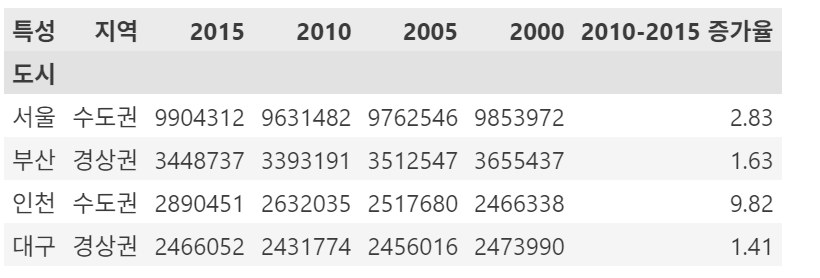

In [124]:
df["2010-2015 증가율"] = df["2010-2015 증가율"] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


"2005-2010 증가율" 컬럼을 계산하여 추가해보자.

In [125]:
((df["2010"] - df["2005"]) / df["2005"] * 100).round(3)

도시
서울   -1.343
부산   -3.398
인천    4.542
대구   -0.987
dtype: float64

In [126]:
df["2005-2010 증가율"] = ((df["2010"] - df["2005"]) / df["2005"] * 100).round(2)
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


컬럼을 삭제할 때는 `del` 명령 사용

In [127]:
del df["2010-2015 증가율"]
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


### 열 인덱싱

데이터프레임은 열 시리즈의 딕셔너리와 비슷하다고 하였다. 따라서 데이터프레임을 인덱싱을 할 때도 **열 라벨(column label)을 키값으로 생각하여 인덱싱**을 할 수 있다. 인덱스로 **라벨 값을 하나만 넣으면 시리즈 객체가 반환**되고 **라벨의 배열 또는 리스트를 넣으면 부분적인 데이터프레임이 반환**된다. 

- 하나의 열만 인덱싱하면 시리즈가 반환된다.

In [128]:
print(type(df['지역']))   ## 열방향 인덱싱
df['지역']

<class 'pandas.core.series.Series'>


도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

- 여러개의 열을 array 인덱싱하면 부분적인 데이터프레임이 반환된다

In [129]:
print(type(df[["2010", "2015"]]))  ## 열방향 다중 인덱싱 (라벨의 배열 또는 리스트)
df[["2010", "2015"]]

<class 'pandas.core.frame.DataFrame'>


특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


만약 **하나의 열만 빼내면서 데이터프레임 자료형을 유지**하고 싶다면 **원소가 하나인 리스트**를 써서 인덱싱하면 된다.

In [130]:
print(df[["2010"]].shape)
df[["2010"]]    # 열방향 인덱싱하여... 데이터프레임으로...(shape=(4,1))

(4, 1)


특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


- Numpy의 벡터와 행렬 관계와 Pandas의 Series vs. DataFrame 관계 비교

In [131]:
# Numpy
print(np.array([1, 2, 3]).shape, np.array([1, 2, 3]).ndim)
np.array([[1, 2, 3]]).shape, np.array([[1, 2, 3]]).ndim

(3,) 1


((1, 3), 2)

In [132]:
# Pandas DataFrame
print(type(df[["2010"]]))
print(df[["2010"]].shape)
df[["2010"]]

<class 'pandas.core.frame.DataFrame'>
(4, 1)


특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [133]:
# Pandas Series
print(type(df['2010']))
print(df['2010'].shape)
df["2010"]   ## (4, 1) DataFrame type의 pandas Series

<class 'pandas.core.series.Series'>
(4,)


도시
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

In [134]:
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [135]:
df["서울"]  ### Error : 행라벨 (Index)로 인덱싱 불가!!! (열라벨(Column명)으로만 인덱싱 가능)

KeyError: '서울'

데이터프레임의 열 인덱스가 문자열 라벨을 가지고 있는 경우에는 순서를 나타내는 정수 인덱스를 열 인덱싱에 사용할 수 없다. **정수 인덱싱**의 **슬라이스**는 뒤에서 설명하겠지만 **행(row)을 인덱싱할 때 사용**하므로 **열을 인덱싱할 때는 쓸 수 없다**. 정수 인덱스를 넣으면 `KeyError` 오류가 발생하는 것을 볼 수 있다.

In [ ]:
try:
    df[0]                  ## 0:없는 키 사용
except Exception as e:
    print(type(e))

 다만 원래부터 문자열이 아닌 정수형 열 인덱스를 가지는 경우에는 인덱스 값으로 정수를 사용할 수 있다.

In [ ]:
import numpy as np
df2 = pd.DataFrame(np.arange(12).reshape(3, 4))   ## numpy array를 DataFrame으로 변환
df2                                               ## 자동으로 indexing

In [ ]:
df2[2]   ## Pandas DataFrame Slicing (열로 인덱싱함!!!)

In [ ]:
df2[[1, 2]]

In [ ]:
# np_array = df2.items()
# np_array[:, 1:3]
df2[1][1]

### 행 인덱싱 (반드시 정수+슬라이싱만 가능)

만약 **행 단위로 인덱싱**을 하고자 하면 **항상 슬라이싱(slicing) 을 해야 한다.** 인덱스의 값이 문자 라벨이면 **라벨 슬라이싱도 가능**하다.

In [ ]:
df

In [ ]:
df[:1] # 행 인덱싱 (정수의 슬라이싱으로 인덱싱하면 "행")

In [ ]:
df[2:]    ## 행 인덱싱 (정수의 슬라이싱=> 행인덱싱 )

- '부산' 행만 슬라이싱

In [ ]:
df[1:2]

- 1~ 2행 슬라이싱

In [ ]:
df[1:3]

* 행의 이름(인덱스)의 슬라이스로 **행방향 슬라이싱** 가능
    - 이 때 뒤의 인덱스도 포함

In [ ]:
df["서울":"부산"]

In [ ]:
### 행방향 이름으로 슬라이싱???

df

In [ ]:
df.T["서울"]

In [ ]:
df.T["서울"].to_frame()

In [ ]:
df.T[["서울", "부산"]].T

### 개별 데이터 인덱싱

데이터프레임에서 **열 라벨로 시리즈를 인덱싱**하면 **시리즈가 된다**. 이 시리즈를 다시 **행 라벨로 인덱싱**하면 **개별 데이터가** 나온다.

In [ ]:
df

In [ ]:
df["2015"]["부산"]     ## 문자열로 인덱싱하면 열 인덱싱이고... 이후에 "서울"로 인덱싱 가능
                      ## df["열(column)인덱스"]["행(row)인덱스"] 로 개별 인덱싱 가능

In [ ]:
df["2015"][1:3]    ##  df[열인덱스][행인덱스]
                      ## numpy에서는 array[행인덱스][열인덱스] *** 순서 반대!!!

지금까지의 **데이터프레임 인덱싱 방법**을 정리하면 다음과 같다.

| 인덱싱 값 | 가능 | 결과 | 자료형 | 추가사항 |
|-|-|-|-|-|
| 라벨 | O | 열 | 시리즈 | |
| 라벨 리스트 | O | 열 | 데이터프레임 | |
| 인덱스데이터(정수) | X |  |  | 열 라벨이 정수인 경우에는 라벨 인덱싱으로 인정 |
| 인덱스데이터(정수) 슬라이스 | O | 행 | 데이터프레임 | |


#### 연습 문제 3

다음 데이터프레임에서 지정하는 데이터를 뽑아내거나 처리하라.

```python
    data = {
        "국어": [80, 90, 70, 30],
        "영어": [90, 70, 60, 40],
        "수학": [90, 60, 80, 70],
    }
    columns = ["국어", "영어", "수학"]
    index = ["지민", "호석", "석진", "태형"]
    df = pd.DataFrame(data, index=index, columns=columns)
```

In [ ]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["지민", "호석", "석진", "태형"]

df = pd.DataFrame(data, index=index, columns=columns)

In [ ]:
df

1. 모든 학생의 수학 점수를 시리즈로 나타낸다.

In [ ]:
df["수학"]

2. 모든 학생의 국어와 영어 점수를 데이터 프레임으로 나타낸다.

In [ ]:
df[["국어", "영어"]]

3. 모든 학생의 각 과목 평균 점수를 새로운 열로 추가한다.

In [ ]:
df["평균"] = df.mean(axis=1).round(2)   ## axis = 1 : 행방향 평균 (새로운 열 생성)
df

4. 태형의 영어 점수를 80점으로 수정하고 평균 점수도 다시 계산한다.

In [ ]:
df["영어"]["태형"] = 80
df["평균"] = df.mean(axis=1).round(2)   
df

5. 지민의 점수를 데이터프레임으로 나타낸다.

In [ ]:
df["지민":"지민"]

6. 석진의 점수를 시리즈로 나타낸다.

In [ ]:
df.T["석진"]  # 시리즈이므로... 

In [ ]:
# 또는 loc 사용
df.loc["석진"]